In [2]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('..')
from src import funciones as f
from src import soporte_prep as sp

# Importaciones:
# Beautifulsoup
from bs4 import BeautifulSoup

# Requests
import requests

import pandas as pd
import numpy as np

from time import sleep

# Importar librerías para automatización de navegadores web con Selenium
# -----------------------------------------------------------------------
from selenium import webdriver  # Selenium es una herramienta para automatizar la interacción con navegadores web.
from webdriver_manager.chrome import ChromeDriverManager  # ChromeDriverManager gestiona la instalación del controlador de Chrome.
from selenium.webdriver.common.keys import Keys  # Keys es útil para simular eventos de teclado en Selenium.
from selenium.webdriver.support.ui import Select  # Select se utiliza para interactuar con elementos <select> en páginas web.
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException # Excepciones comunes de selenium que nos podemos encontrar
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
driver = webdriver.Chrome()
url_pvehicular = "https://dgii.gov.do/estadisticas/parquevehicular/Paginas/default.aspx"
driver.get(url_pvehicular)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll
#descargo el excel completo
try: 
    driver.find_element("xpath", '/html/body/form/div[4]/div/div/div/div[2]/span/div[1]/div/div/div[2]/div/div[2]/div/div[1]/div[1]/div/div[1]/div/div/div/div/ul/li[1]/a/div/div[2]').click()
except:
    print('No encuentro el botón para descargar')

for i in range(3):
    try:
        driver.execute_script("window.scrollBy(0, 500);")  # Desplazarse 1000 píxeles hacia abajo
    except:
        print('No he podido descender')
# descargo el excel de lo que va de año
driver.find_element('xpath', '/html/body/form/div[4]/div/div/div/div[2]/span/div[1]/div/div/div[2]/div/div[2]/div/div[2]/div/div/div[1]/div/div/div/div/ul/li[1]/a/div').click()

# Registro Histórico del Parque Vehicular

## Registro hasta diciembre del 2023, por provincias

In [3]:
df_2023 = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.3.1', skiprows=11, index_col=0)

In [4]:
df_2023.reset_index(drop=True, inplace=True)

In [5]:
df_2023.head()

,Provincia,Tipo de Vehículo,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Total,Total %
0,NaN,Automóviles,Autobuses,Jeep,Carga,Motocicletas,Volteo,Máquinas Pesadas,Otros,NaN,NaN
1,Azua,7641,1352,4935,6559,52576,341,129,129,73662.0,1.267655
2,Bahoruco,2288,388,1326,1114,11407,97,22,25,16667.0,0.286824
3,Barahona,6637,1081,5175,3916,44324,262,78,208,61681.0,1.061473
4,Dajabón,2515,222,2421,2290,26624,114,129,57,34372.0,0.591510


In [6]:
# Renombrar las columnas manualmente
df_2023.columns = [
    "Provincia", 
    "Automóviles", 
    "Autobuses", 
    "Jeep", 
    "Carga", 
    "Motocicletas", 
    "Volteo", 
    "Máquinas Pesadas", 
    "Otros", 
    "Total", 
    "Total %"
]

df_2023 = df_2023.iloc[1:]

In [7]:
df_2023 = df_2023.iloc[:33]

In [8]:
df_2023.reset_index(drop=True, inplace=True)

In [9]:
df_2023.head()

,Provincia,Automóviles,Autobuses,Jeep,Carga,Motocicletas,Volteo,Máquinas Pesadas,Otros,Total,Total %
0,Azua,7641,1352,4935,6559,52576,341,129,129,73662.0,1.267655
1,Bahoruco,2288,388,1326,1114,11407,97,22,25,16667.0,0.286824
2,Barahona,6637,1081,5175,3916,44324,262,78,208,61681.0,1.061473
3,Dajabón,2515,222,2421,2290,26624,114,129,57,34372.0,0.591510
4,Distrito Nacional,446535,49784,227089,208389,772371,9328,12329,11920,1737745.0,29.904982


In [10]:
df_2023.to_csv('../Datos/datos_parquev/df_2023.csv')

# EDA hasta el 2023

Para el cierre del 2023, el país contaba con un total de 5,810,888 vehículos en todo el territorio. De los cuáles el 56% corresponde a motocicletas, el 19.3% pertenece a automóviles y un 11.67% se atribuye a las famosas jeepetas o 'Jeep'. El resto se distribuye en vehículos de carga, autobuses, máquinas pesadas, volteo y otros.

En cuanto a la distribución del parque vehicular en las respectivas provincias, tenemos que relativamente el 30% (29.90%) de los vehículos se encuentran en la capital (Distrito Nacional). Seguido de Santo Domingo con un 16%, para luego mencionar a Santiago y La Vega. Estas últimas con un 7.93% y 5.38% respectivamente. Esto nos indica que el 45% de los vehículos se encuentra en la Región Ozama (Distrito Nacional y Santo Domingo), mientras que las siguientes provincias que más vehículos poseen se ubican en el Norte: Santiago, Región Cibao Norte y La Vega, Región Cibao Sur; aportando entre estas el porcentaje suficiente para elevar la presencia vehicular al 60% de su presencia en el país. A estas les acompaña en el top 5, la provincia de San Cristóbal, la cual pertenece a la región de Valdesia pero mantiene cercanía geográfica con las de la Región Ozama.

En cuanto a la distribución de los vehículos por las provincias, el Distrito Nacional se queda con la concentración de todas las categorías. Entre puntos importantes a mencionar están:
    - Automóviles por encima de 440,000 (446,535)
    - Autobuses rozando los 50,000 (49784)
    - Jeep por la mitad de automóviles (227,089)
    - Motocicletas es el dato más alarmante ya que solo esta categoría se encuentra cerca del millón (772,371)

Podemos ver en las demás provincias importantes que hemos señalado, en Santo Domingo también hay grandes números:
    - Automoviles 258,110
    - Jeep hay 135623
    - Motocicletas 413,411

En estos dos casos se puede observar que los números son elevados, pero queda claro de que las motocicletas pueden superar a los vehículos casi un ratio de 2:1. Esto se puede ver explicado de una manera muy sencilla: son zonas relativamente pequeñas en cuanto a tamaño, pero concentran una gran cantidad de vehículos produciéndose así muchos embotellamientos vehiculares. Sin embargo, no queda solo ahí: muchas personas recurren a este medio de transporte como sistén económico (lo usan para movilizar personas, cosas o hacer mandados) por lo que este vehículo en sí es una inversión directa para su bien económico y soporte familiar. Así mismo, incurrir en los gatos para una motocicleta supone una inversión sumamente menor a lo que suele costar un coche por lo que la gran mayoría de personas que no tienen los recursos (clase media-baja, baja) utilizan la motocicleta como medio de transporte. Además de que la República Dominicana no es un país que cuente con accesibilidad para un tranporte público de calidad, ya que no hay muchas opciones y estas no cubren la gran mayoría de zonas.

Para el 2023, se puede observar que dentro de las categorías de vehículos presentes están predominando prácticamente las mismas que corresponden al top 5. Sin embargo, podemos encontrar que:
    - En Autobuses, la provincia de La Altagracia entra al cuarto (4) lugar. Esto se puede asociar al alto nivel de turistas que son movilizados en esta zona por el medio de transporte ya mencionado. En este caso no hace presencia La Vega.
    - En Jeep, la provincia de Puerto Plata hace presencia en el quinto (5) lugar sustituyendo a San Cristóbal.
    - En cuanto a Máquinas Pesadas, la provincia Duarte hace presencia en lugar de San Cristóbal.

In [11]:
df_2023.describe()

,Total,Total %
count,3.300000e+01,33.000000
mean,3.521750e+05,6.060606
std,1.033640e+06,17.787980
min,5.581000e+03,0.096044
25%,3.437200e+04,0.591510
50%,9.127100e+04,1.570689
75%,1.697370e+05,2.921017
max,5.810888e+06,100.000000


In [12]:
df_total_2023 = df_2023.iloc[[-1]].T

In [13]:
df_total_2023.rename(columns={32:'Cantidad'}, inplace=True)

In [14]:
df_total_2023 = df_total_2023.iloc[1:10]

In [15]:
df_total_2023['Cantidad'] = df_total_2023['Cantidad'].astype(float)

In [16]:
df_total_2023['Total_%'] = (df_total_2023['Cantidad'] / 5810888.0) * 100

In [17]:
df_total_2023.sort_values(by='Cantidad', ascending=False)

,Cantidad,Total_%
Total,5810888.0,100.000000
Motocicletas,3281018.0,56.463281
Automóviles,1122336.0,19.314363
Jeep,678470.0,11.675840
Carga,521278.0,8.970712
Autobuses,130691.0,2.249071
Máquinas Pesadas,27582.0,0.474661
Volteo,25545.0,0.439606
Otros,23968.0,0.412467


In [18]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         33 non-null     object 
 1   Automóviles       33 non-null     object 
 2   Autobuses         33 non-null     object 
 3   Jeep              33 non-null     object 
 4   Carga             33 non-null     object 
 5   Motocicletas      33 non-null     object 
 6   Volteo            33 non-null     object 
 7   Máquinas Pesadas  33 non-null     object 
 8   Otros             33 non-null     object 
 9   Total             33 non-null     float64
 10  Total %           33 non-null     float64
dtypes: float64(2), object(9)
memory usage: 3.0+ KB


In [19]:
columnas_int = df_2023.iloc[:,1:9].columns.tolist()

df_2023[columnas_int] = df_2023[columnas_int].astype(int)

In [20]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Provincia         33 non-null     object 
 1   Automóviles       33 non-null     int32  
 2   Autobuses         33 non-null     int32  
 3   Jeep              33 non-null     int32  
 4   Carga             33 non-null     int32  
 5   Motocicletas      33 non-null     int32  
 6   Volteo            33 non-null     int32  
 7   Máquinas Pesadas  33 non-null     int32  
 8   Otros             33 non-null     int32  
 9   Total             33 non-null     float64
 10  Total %           33 non-null     float64
dtypes: float64(2), int32(8), object(1)
memory usage: 1.9+ KB


In [21]:
df_2023.describe()

,Automóviles,Autobuses,Jeep,Carga,Motocicletas,Volteo,Máquinas Pesadas,Otros,Total,Total %
count,3.300000e+01,33.000000,33.000000,33.000000,3.300000e+01,33.000000,33.000000,33.000000,3.300000e+01,33.000000
mean,6.802036e+04,7920.666667,41119.393939,31592.606061,1.988496e+05,1548.181818,1671.636364,1452.606061,3.521750e+05,6.060606
std,2.085470e+05,24169.489846,123098.391072,95771.665282,5.721192e+05,4625.043956,5132.509047,4579.805549,1.033640e+06,17.787980
min,6.030000e+02,86.000000,486.000000,505.000000,3.740000e+03,41.000000,12.000000,5.000000,5.581000e+03,0.096044
25%,2.515000e+03,405.000000,2820.000000,2452.000000,2.662400e+04,126.000000,94.000000,55.000000,3.437200e+04,0.591510
50%,9.764000e+03,1081.000000,6484.000000,5828.000000,6.632600e+04,341.000000,289.000000,183.000000,9.127100e+04,1.570689
75%,2.142600e+04,2723.000000,16131.000000,12704.000000,1.206440e+05,546.000000,562.000000,434.000000,1.697370e+05,2.921017
max,1.122336e+06,130691.000000,678470.000000,521278.000000,3.281018e+06,25545.000000,27582.000000,23968.000000,5.810888e+06,100.000000


In [22]:
df_2023[['Provincia', 'Total', 'Total %']].sort_values(by='Total', ascending=False)[1:11]

,Provincia,Total,Total %
4,Distrito Nacional,1737745.0,29.904982
30,Santo Domingo,933901.0,16.071571
28,Santiago,461275.0,7.938115
14,La Vega,313193.0,5.389761
23,San Cristóbal,256841.0,4.419996
12,La Altagracia,186133.0,3.203177
5,Duarte,174479.0,3.002622
13,La Romana,169737.0,2.921017
21,Puerto Plata,154919.0,2.666012
26,San Pedro de Macorís,141045.0,2.427254


In [23]:
df_2023 = df_2023.iloc[:32] # de esta forma quito la última fila de total

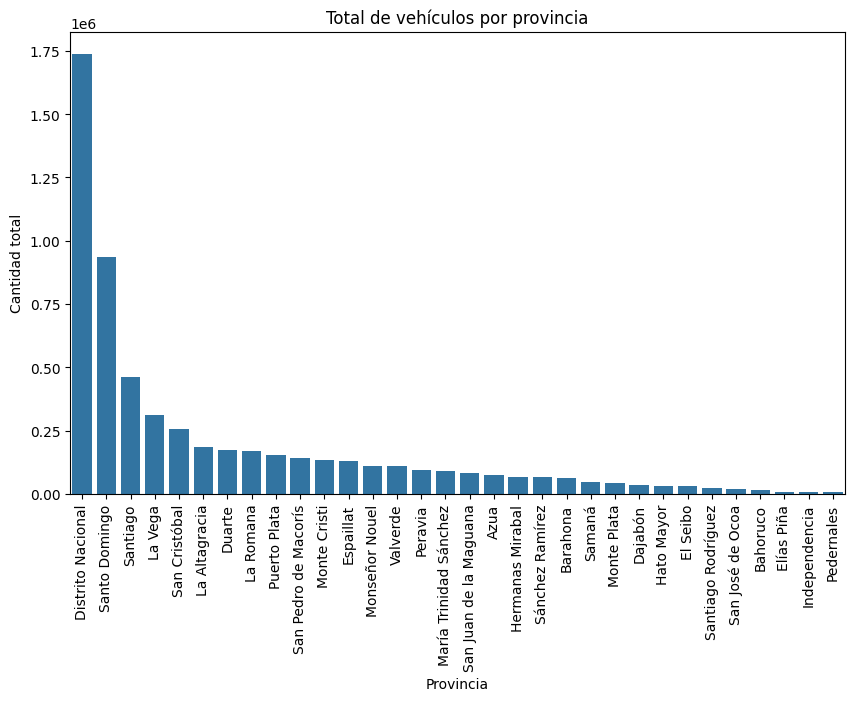

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Provincia', y= 'Total', data=df_2023, order=df_2023.sort_values(by='Total', ascending=False)['Provincia'])
plt.title('Total de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad total')
plt.xticks(rotation=90)
plt.show()

Vemos como se eleva por encima de las demás el Distrito Nacional, donde se concentra el 30% del parque vehicular del país.

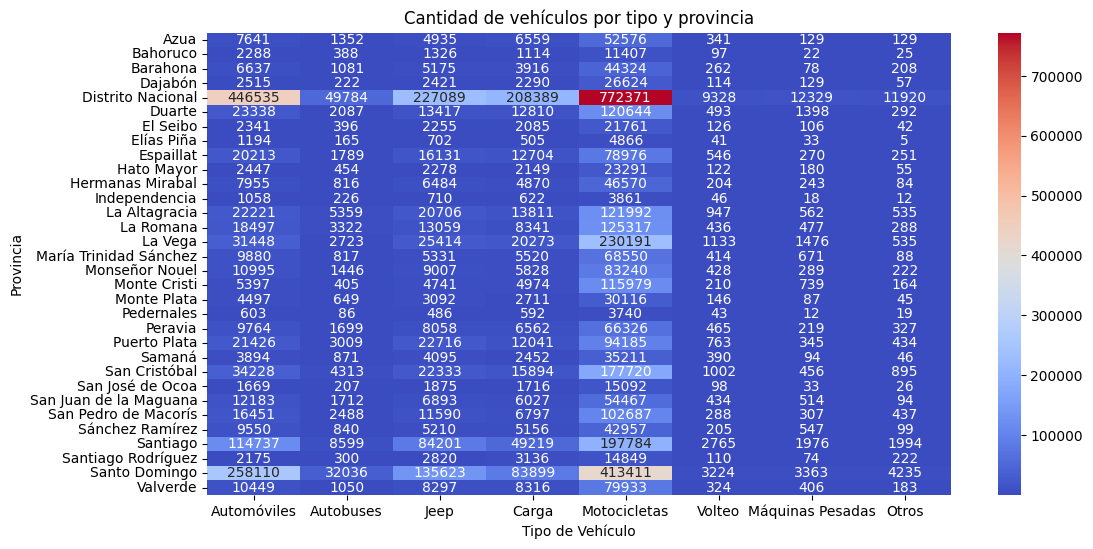

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_2023[columnas_int], annot=True, fmt='d', cmap='coolwarm', xticklabels=columnas_int, yticklabels=df_2023['Provincia'])
plt.title('Cantidad de vehículos por tipo y provincia')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Provincia')
plt.show()

En cuanto al tipo de vehículo, podemos observar algunas cosas: (Cabe destacar que Santo Domingo es 10 veces más grande que el Distrito Nacional)
    - Para los automóviles, solo en el caso de Distrito Nacional, Santo Domingo y Santiago se superan las 100.000 unidades.
    - Autobuses no poseen una gran concentración a destacar, sin embargo se mencionan el Distrito Nacional y Santo Domingo como las provincias de mayor concentración de estos. Considerable con la lógica ya que son 2 de las provincias con mayor población (que también se refire a que estas son utilizadas para la constante movilización de personas)
    - Jeeps poseen una participación similar a la categoría de los autobuses. Predomina su presencia en el Distrito Nacional con más de 200.000 unidades, luego solo Santo Domingo supera el centenar de miles. Apenas superando las 80 mil unidades se encuentra Santiago.
    - Carga, nuevamente sigue el patrón que ya hemos visto donde el Distrito supera a las demás. En este caso hace sentido porque desde y hacia el Distrito hay mucho movimiento de cosas pesadas, además de construcciones que requiere la movilización de artículos por lo que su presecia aquí está explicada.
    - Motocicletas existe una diferencia muy notable entre el Distrito con las demás provincias pero en este apartado es mucho más frecuente ver casos con más de 100.000 unidades. En el caso de las motocicletas, podemos ver hasta 10 provincias por encima del centenar de unidades. Aquí hacen presencia provincias como: La Romana, La Altagracia, Duarte, Monte Cristi, San Pedro de Macorís. Si vemos la imagen general, solo 3 provincias tienen menos de 10 mil unidades de motocicletas. Esto va acorde a la constumbre del país por un medio de transporte más rápido y mayor facilidad de movilidad. Además un medio que involucra menor gasto que un vehículo de 4 ruedas.

In [26]:
df_2023[['Provincia', 'Automóviles']].sort_values(by='Automóviles', ascending=False).head()

,Provincia,Automóviles
4,Distrito Nacional,446535
30,Santo Domingo,258110
28,Santiago,114737
23,San Cristóbal,34228
14,La Vega,31448


In [27]:
df_2023[['Provincia', 'Motocicletas']].sort_values(by='Motocicletas', ascending=False)[:10]

,Provincia,Motocicletas
4,Distrito Nacional,772371
30,Santo Domingo,413411
14,La Vega,230191
28,Santiago,197784
23,San Cristóbal,177720
13,La Romana,125317
12,La Altagracia,121992
5,Duarte,120644
17,Monte Cristi,115979
26,San Pedro de Macorís,102687


In [28]:
df_2023[['Provincia', 'Motocicletas']].sort_values(by='Motocicletas').head()

,Provincia,Motocicletas
19,Pedernales,3740
11,Independencia,3861
7,Elías Piña,4866
1,Bahoruco,11407
29,Santiago Rodríguez,14849


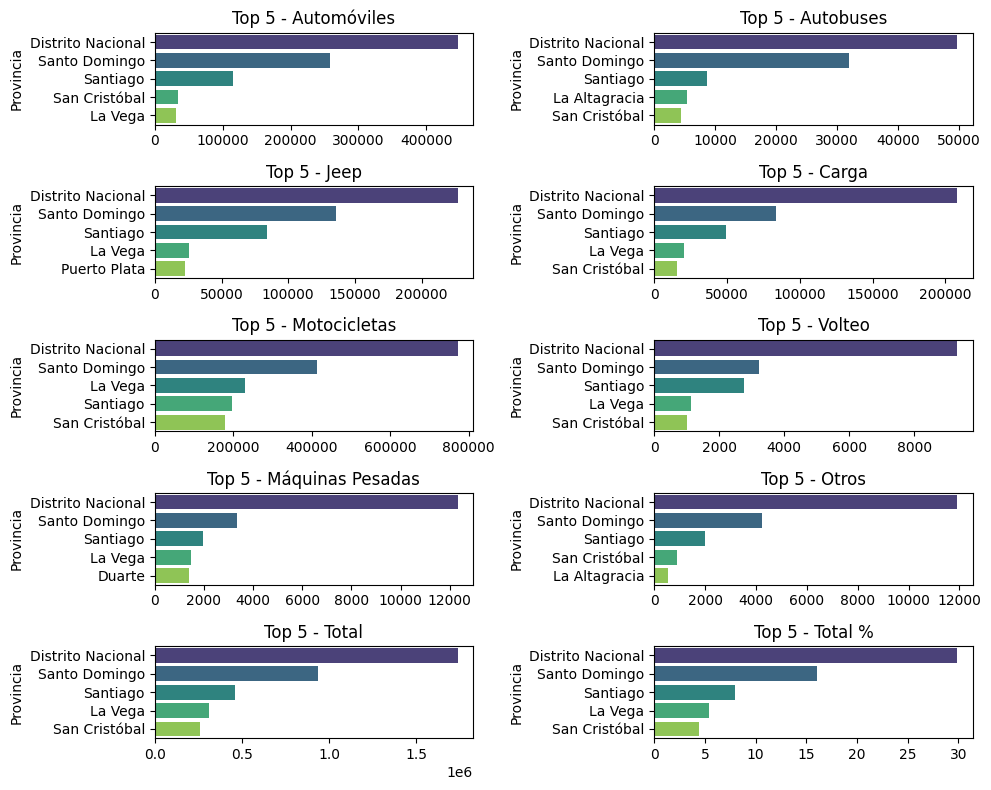

In [29]:
f.plot_top_numericas(dataframe=df_2023, columna_categoria='Provincia', top_n=5)

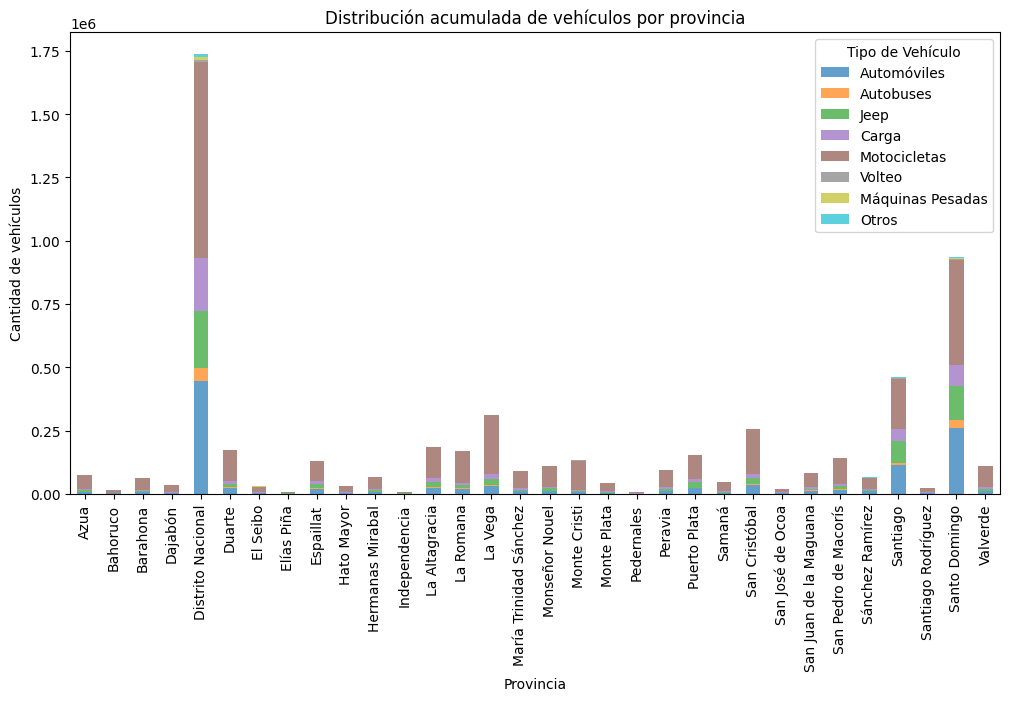

In [30]:
df_2023[columnas_int].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.7)
plt.title('Distribución acumulada de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de vehículos')
plt.xticks(ticks=range(len(df_2023['Provincia'])), labels=df_2023['Provincia'], rotation=90)
plt.legend(title='Tipo de Vehículo')
plt.show()

## Registro 2024

## Histórico

En cuanto al avance histórico de los medios de transporte, desde el 2005 hasta el 2023, vamos a destacar 3 categorías: Automóviles, Jeep y Motocicletas. 

- En el caso de las motocicletas, estas tenían un número de 843941 en el 2005 para superar los 3 millones en el 2023 (3,281,018) produciéndose un aumento de 2437077. Cabe destacar que este es el grupo con mayor presencia en cuanto a los medios de transporte en la República Dominicana.
- En el caso de los automóviles, se ha mantenido en el segundo lugar en cuanto al registro histórico. Este ha conseguido un aumento gradual pero no tan marcado como las motocicletas. En el 2005 habían poco más de medio millón de coches en el país (560,880), mientras que para el 2023 era de más de un millón (1122336)
- En el caso de los jeep, comenzó el siglo ocupando el tercer lugar por debajo de los vehículos de carga. Había poco más de 100 mil unidades (124802), mientras que para el 2023 ya se ha multiplicado por 5 esta cantidad (678470)

Desde el 2005 al 2010, primera década documentada, el número de vehículos presentes en el país aumentó casi un millón (1.900.564 a 2.734.740). Al entrar la década del 2010, se ve un aumento de 2 millones en tan solo 10 años. Para el 2012 se superan los 3.000.000 (3 millones) presentes, algo que ya para el 2017 se ve nuevamente incrementado enormemente y logrando superar los 4.000.000 (4 millones). Se cierra la década del 2010, con poco menos de 5 millones (4.842.367).

Al iniciar la década del 2020, ya en su primer año se ve superado otro hito ya que se alcanzan los 5.000.000 (5 millones). Y solo en apenas dos años, del 2021 al 2023 se acerca bastante a superar otro hito (6 millones de unidades)

Justo para el año siguiente, y apenas en el mes de noviembre, ya se había superado otro límite (6 millones) logrando alcanzar 6.160.988 vehículos.

In [227]:
df_historico = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='Serie Histórica', skiprows=5, index_col=0)

In [228]:
df_historico.head()

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,2014.0,2014.0,2014.0
NaN,Automóviles1/,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
NaN,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
NaN,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
NaN,Carga 2/,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0


In [229]:
df_historico = df_historico.iloc[1:10,:]

In [230]:
df_historico.reset_index(drop=True, inplace=True)
df_historico.head()

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles1/,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga 2/,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0


In [231]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles1/,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga 2/,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0
7,Otros 3/,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0


In [232]:
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tipo    9 non-null      object 
 1   1998    9 non-null      float64
 2   1999    9 non-null      float64
 3   2000    9 non-null      float64
 4   2001    9 non-null      float64
 5   2002    9 non-null      float64
 6   2003    9 non-null      float64
 7   2004    9 non-null      float64
 8   2005    9 non-null      float64
 9   2006    9 non-null      float64
 10  2007    9 non-null      float64
 11  2008    9 non-null      float64
 12  2009    9 non-null      float64
 13  2010    9 non-null      float64
 14  2011    9 non-null      float64
 15  2012    9 non-null      float64
 16  2013    9 non-null      float64
 17  2014    9 non-null      float64
 18  2015    9 non-null      float64
 19  2016    9 non-null      float64
 20  2017    9 non-null      float64
 21  2018    9 non-null      float64
 22  2019  

In [233]:
df_historico['Tipo'] = df_historico['Tipo'].str.replace(r'\d+/.*', '', regex=True).str.strip()

In [234]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0


In [235]:
total_history = df_historico.iloc[[-1]]

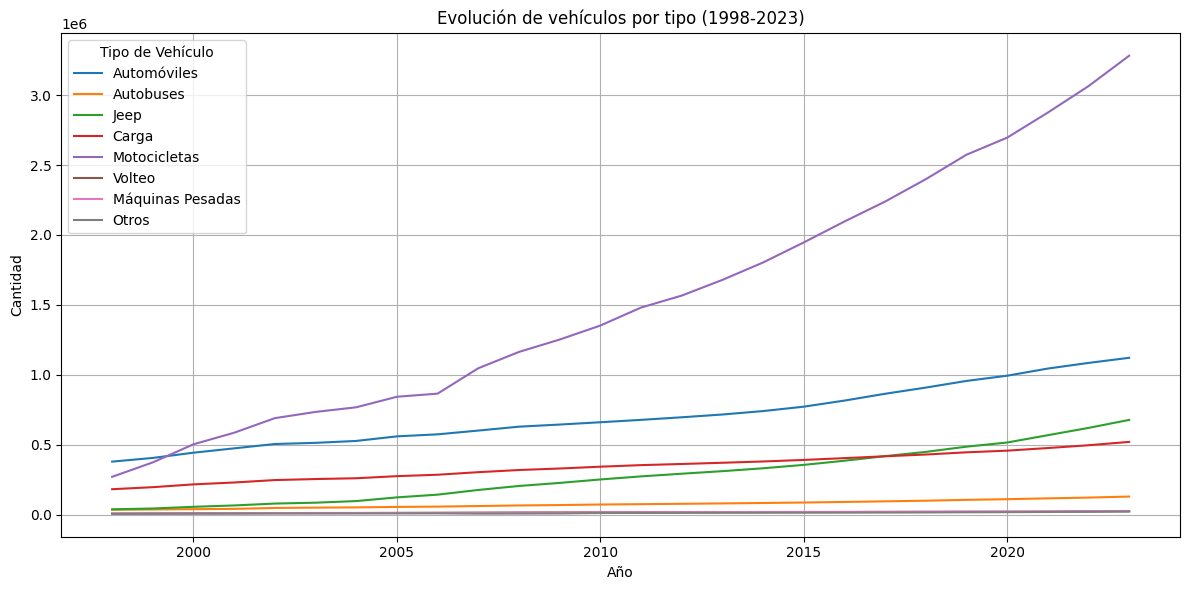

In [237]:
# cambio el formato al DataFrame a formato largo
df_long = df_historico[:8].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (1998-2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede apreciar el crecimiento exorbitante de la cantidad de Motocicletas, en comparación con los demás tipos de vehículos.

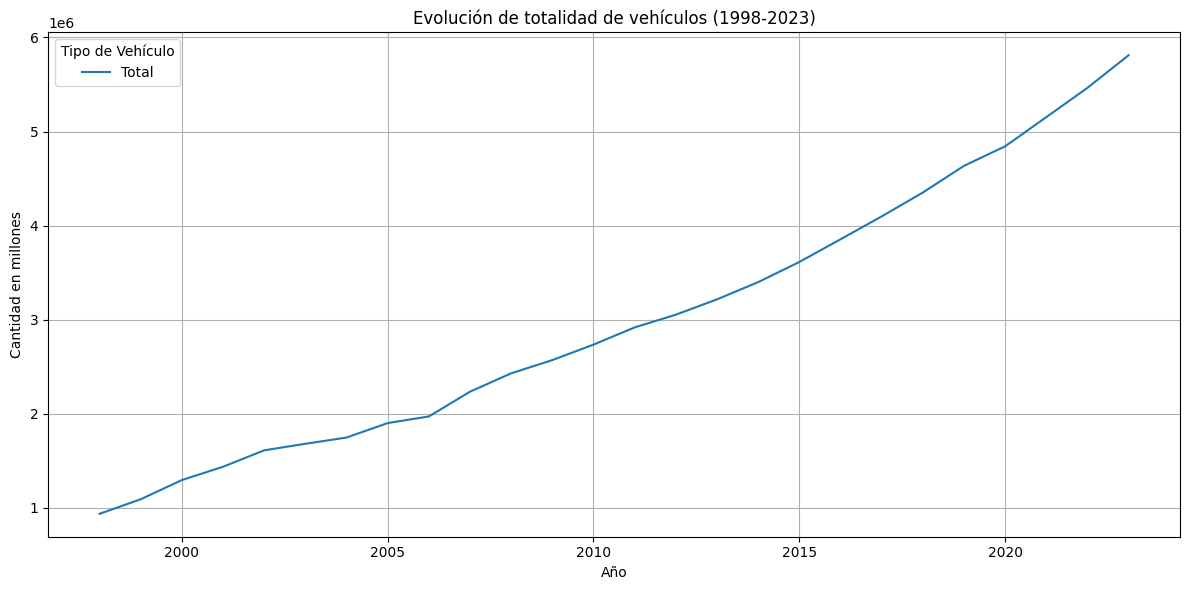

In [239]:
# aqui solo me quedo con el formato largo de la fila total
df_long_total = total_history[-1:].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_total, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de totalidad de vehículos (1998-2023)')
plt.xlabel('Año')
plt.ylabel('Cantidad en millones')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede apreciar un incremento constante a lo largo del tiempo.

In [240]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0


In [241]:
df_historico[['Tipo', 2023]]

,Tipo,2023
0,Automóviles,1122336.0
1,Autobuses,130691.0
2,Jeep,678470.0
3,Carga,521278.0
4,Motocicletas,3281018.0
5,Volteo,25545.0
6,Máquinas Pesadas,27582.0
7,Otros,23968.0
8,Total,5810888.0


## Registro del 2024

In [242]:
df_actual = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2024\\Parque Vehicular.xlsx', sheet_name='Stock vehiculos', skiprows=9)

In [243]:
df_actual.head()

,Tipo de Vehículo,Cantidad a diciembre 2023*,Año 2024,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre
1,Ambulancia,1630.0,1649,1657,1659,1664,1672,1683,1689,1689,1691,1705,1707
2,Autobús Privado,124611.0,125118,125778,126429,127113,127921,128468,129217,129769,130629,131633,132244
3,Autobús Público Interurbano,3646.0,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646,3646
4,Autobús Público Urbano,1305.0,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305,1305


In [244]:
df_actual = df_actual.iloc[1:19]

In [245]:
df_actual.reset_index(drop=True, inplace=True)

In [246]:
df_actual.shape

(18, 13)

In [247]:
df_actual.columns = [
    'Tipo_Vehiculo',
    "Diciembre_2023", 
    "Enero", 
    "Febrero", 
    "Marzo", 
    "Abril", 
    "Mayo", 
    "Junio", 
    "Julio", 
    "Agosto", 
    "Septiembre", 
    "Octubre", 
    'Noviembre'
]

In [248]:
df_actual['Tipo_Vehiculo'] = df_actual['Tipo_Vehiculo'].str.strip()

In [249]:
df_actual_completo = df_actual.copy()

In [250]:
df_actual_completo = df_actual_completo.iloc[:,0:2]
df_actual_completo

,Tipo_Vehiculo,Diciembre_2023
0,Ambulancia,1630.0
1,Autobús Privado,124611.0
2,Autobús Público Interurbano,3646.0
3,Autobús Público Urbano,1305.0
4,Autobús Turístico,1129.0
5,Automóvil Interurbano (Público),10540.0
6,Automóvil Privado,1092385.0
7,Automóvil Público Urbano,17633.0
8,Automóvil Turístico,1778.0
9,Carga,521278.0


In [251]:
df_actual_completo['Noviembre_2024'] = df_actual['Noviembre']
df_actual_completo

,Tipo_Vehiculo,Diciembre_2023,Noviembre_2024
0,Ambulancia,1630.0,1707
1,Autobús Privado,124611.0,132244
2,Autobús Público Interurbano,3646.0,3646
3,Autobús Público Urbano,1305.0,1305
4,Autobús Turístico,1129.0,1128
5,Automóvil Interurbano (Público),10540.0,10539
6,Automóvil Privado,1092385.0,1125693
7,Automóvil Público Urbano,17633.0,17625
8,Automóvil Turístico,1778.0,1775
9,Carga,521278.0,545902


In [252]:
df_actual[['Tipo_Vehiculo', 'Noviembre']]

,Tipo_Vehiculo,Noviembre
0,Ambulancia,1707
1,Autobús Privado,132244
2,Autobús Público Interurbano,3646
3,Autobús Público Urbano,1305
4,Autobús Turístico,1128
5,Automóvil Interurbano (Público),10539
6,Automóvil Privado,1125693
7,Automóvil Público Urbano,17625
8,Automóvil Turístico,1775
9,Carga,545902


- Debido a que tengo los datos de los automóviles en distintas categorías, debo sumar estos valores para conseguir el valor correspondiente a Noviembre de todos ellos. Lo cual también sucede con los Autobuses.

In [253]:
filtro_automovil = df_actual['Tipo_Vehiculo'].str.contains('Automóvil')
suma_automovil = df_actual.loc[filtro_automovil, 'Noviembre'].sum()
df_historico.loc[df_historico['Tipo'] == 'Automóviles', '2024'] = suma_automovil

In [254]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,1155632.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,NaN
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,NaN
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,NaN
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,NaN
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,NaN
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,NaN
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,NaN
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,NaN


In [255]:
filtro_autobus = df_actual['Tipo_Vehiculo'].str.contains('Autobús')
suma_autobus = df_actual.loc[filtro_autobus, 'Noviembre'].sum()
df_historico.loc[df_historico['Tipo'] == 'Autobuses', '2024'] = suma_autobus
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,1155632.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,138323.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,NaN
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,NaN
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,NaN
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,NaN
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,NaN
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,NaN
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,NaN


In [256]:
df_historico.loc[df_historico['Tipo'] == 'Jeep', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Jeep', 'Noviembre'].values[0]
df_historico.loc[df_historico['Tipo'] == 'Carga', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Carga', 'Noviembre'].values[0]
df_historico.loc[df_historico['Tipo'] == 'Motocicletas', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Motocicleta', 'Noviembre'].values[0]
df_historico.loc[df_historico['Tipo'] == 'Volteo', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Volteo', 'Noviembre'].values[0]
df_historico.loc[df_historico['Tipo'] == 'Máquinas Pesadas', '2024'] = df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Maquina Pesada', 'Noviembre'].values[0]

- Ya que el apartado de categorías abarca las opciones restantes, sumo los valores de estas para sacar el valor para esta categoría en el data frame que acumula todas.

In [257]:
df_historico.loc[df_historico['Tipo'] == 'Otros', '2024'] = (df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Ambulancia', 'Noviembre'].values[0] + 
                                                             df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Fúnebre', 'Noviembre'].values[0] + 
                                                             df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Montacarga', 'Noviembre'].values[0] + 
                                                             df_actual.loc[df_actual['Tipo_Vehiculo'] == 'Remolque', 'Noviembre'].values[0])

In [258]:
df_historico.iloc[:]

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,1155632.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,138323.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,731357.0
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,545902.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,3509088.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,26897.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,28486.0
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,25303.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,NaN


In [259]:
df_historico.loc[df_historico['Tipo'] == 'Total', '2024'] = df_actual['Noviembre'].iloc[-1]

In [260]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,1155632.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,138323.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,731357.0
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,545902.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,3509088.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,26897.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,28486.0
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,25303.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,6160988.0


### EDA Récord Histórico de vehículos hasta 2024

In [261]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,1155632.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,138323.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,731357.0
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,545902.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,3509088.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,26897.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,28486.0
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,25303.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,6160988.0


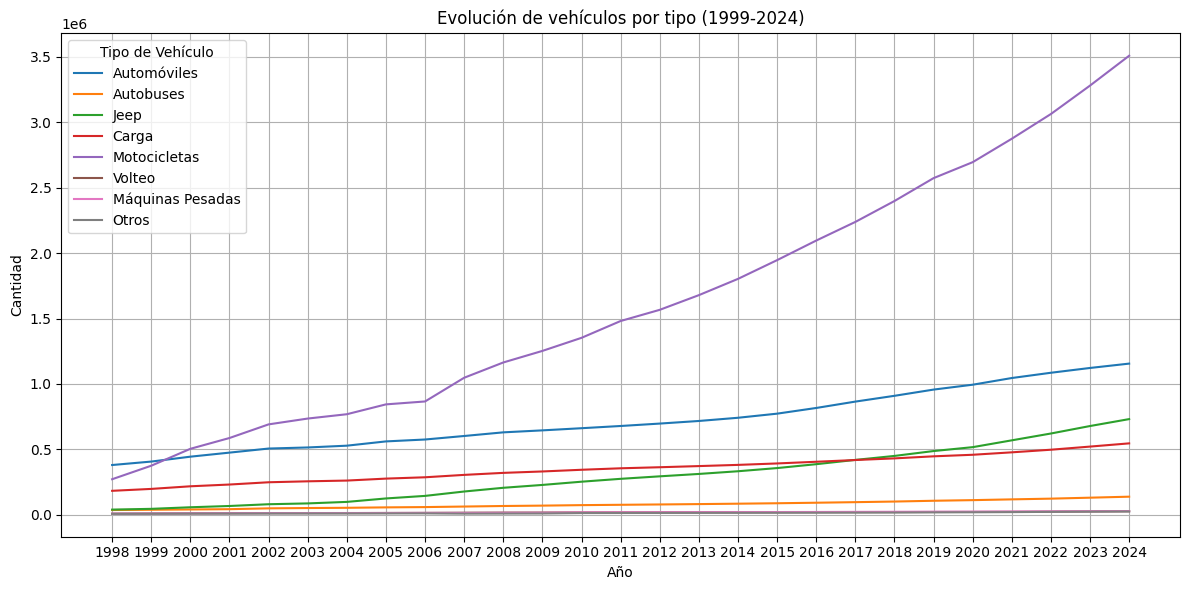

In [262]:
# cambio el formato al DataFrame a formato largo
df_long = df_historico[:8].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

df_long['Año'] = df_long['Año'].astype(str) # para poder visualizar el eje x en un formato visual completo de años
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (1999-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede visualizar el aumento que viene desde años anteriores pero cabe destacar las sigueintes observaciones:
    - Las motocicletas han alcanzado más de 3.5 MM de unidades para Noviembre el 2024.
    - Las Jeep han pasado a un nuevo renglón, superando la barrera de 700 mil unidades.
    - Los demas valores, dentro de las categorías que ya conocemos, todos se mantienen en valores cercanos al año anterior

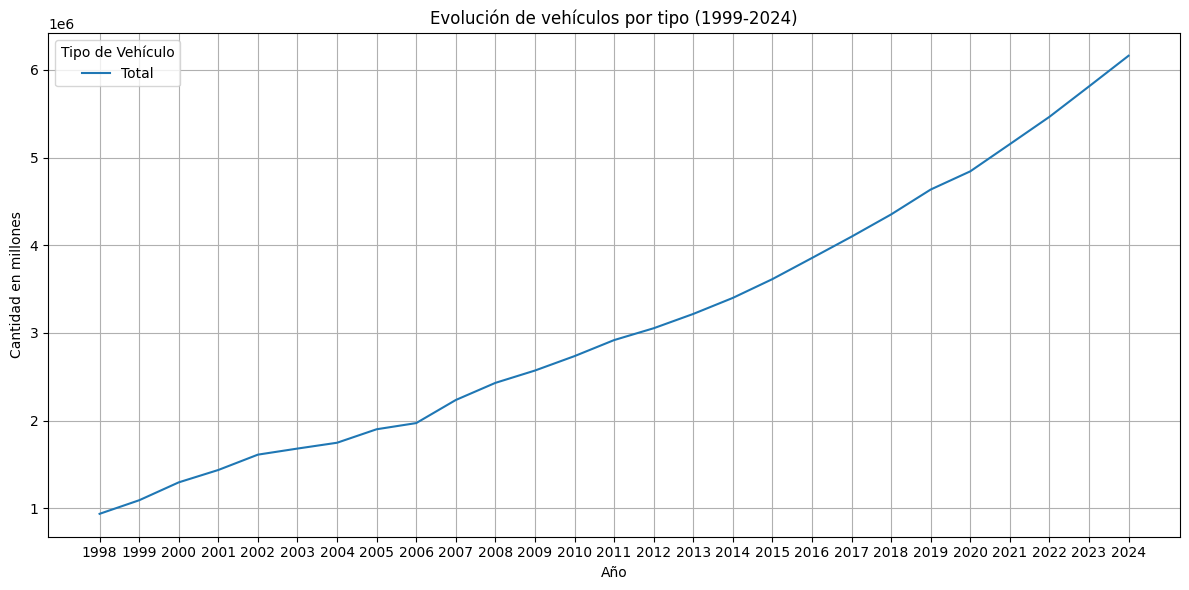

In [263]:
# aqui solo me quedo con el formato largo de la fila total
df_long_total = df_historico[-1:].melt(id_vars='Tipo', 
                            var_name='Año', 
                            value_name='Cantidad')

df_long_total['Año'] = df_long_total['Año'].astype(str) # para poder visualizar 
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long_total, x='Año', y='Cantidad', hue='Tipo')
plt.title('Evolución de vehículos por tipo (1999-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad en millones')
plt.legend(title='Tipo de Vehículo')
plt.grid(True)
plt.tight_layout()
plt.show()

Para noviembre del 2024, ya se superan las 6 MM de unidades en total de vehículos. Esto dejando de lado el rango de 5 unidades de millón en apenas 3 años.

### Género de dueño por vehículos

Cabe destacar que esta tabla viene aportando solo vlos ehículos pertenecientes a personas físicas, por lo que el número de vehículos está reducido del total del parque vehicular.

In [264]:
df_genero = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.6', skiprows=7, index_col=0)

In [265]:
df_genero.head()

,Unnamed: 1,Provincia,Género,Unnamed: 4,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8,Provincia.1,Género.1,Unnamed: 11,Total.1
NaN,NaN,NaN,Femenino,Masculino,NaN,NaN,NaN,NaN,NaN,Femenino,Masculino,NaN
NaN,NaN,Azua,11977,54694,66671.0,NaN,NaN,NaN,Azua,0.18,0.82,1.0
NaN,NaN,Bahoruco,3191,12020,15211.0,NaN,NaN,NaN,Bahoruco,0.21,0.79,1.0
NaN,NaN,Barahona,10933,41140,52073.0,NaN,NaN,NaN,Barahona,0.21,0.79,1.0
NaN,NaN,Dajabón,6001,16761,22762.0,NaN,NaN,NaN,Dajabón,0.264,0.736,1.0


In [266]:
df_genero = df_genero.iloc[1:33, 1:5]
df_genero.reset_index(drop=True, inplace=True)

In [267]:
df_genero.head()

,Provincia,Género,Unnamed: 4,Total
0,Azua,11977,54694,66671.0
1,Bahoruco,3191,12020,15211.0
2,Barahona,10933,41140,52073.0
3,Dajabón,6001,16761,22762.0
4,Distrito Nacional,242930,891466,1134396.0


In [268]:
df_genero.columns = ['Provincia', 'Femenino', 'Masculino', 'Total']

In [269]:
df_genero.head()

,Provincia,Femenino,Masculino,Total
0,Azua,11977,54694,66671.0
1,Bahoruco,3191,12020,15211.0
2,Barahona,10933,41140,52073.0
3,Dajabón,6001,16761,22762.0
4,Distrito Nacional,242930,891466,1134396.0


In [270]:
df_genero['%_Femenino'] = df_genero['Femenino'] / df_genero['Total'] *100
df_genero['%_Masculino'] = df_genero['Masculino'] / df_genero['Total']*100
df_genero.head()

,Provincia,Femenino,Masculino,Total,%_Femenino,%_Masculino
0,Azua,11977,54694,66671.0,17.964332,82.035668
1,Bahoruco,3191,12020,15211.0,20.978239,79.021761
2,Barahona,10933,41140,52073.0,20.995526,79.004474
3,Dajabón,6001,16761,22762.0,26.364116,73.635884
4,Distrito Nacional,242930,891466,1134396.0,21.41492,78.58508


In [271]:
df_genero = df_genero[['Provincia', 'Femenino', 'Masculino', '%_Femenino', '%_Masculino', 'Total']]
df_genero.head()

,Provincia,Femenino,Masculino,%_Femenino,%_Masculino,Total
0,Azua,11977,54694,17.964332,82.035668,66671.0
1,Bahoruco,3191,12020,20.978239,79.021761,15211.0
2,Barahona,10933,41140,20.995526,79.004474,52073.0
3,Dajabón,6001,16761,26.364116,73.635884,22762.0
4,Distrito Nacional,242930,891466,21.41492,78.58508,1134396.0


### EDA
- 

### Antiguedad de vehículos

In [272]:
df_antiguedad = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.9', skiprows=9, index_col=0)

In [273]:
df_antiguedad = df_antiguedad.iloc[1:27]
df_antiguedad.reset_index(drop=True, inplace=True)

In [274]:
df_antiguedad.head()

,Año de Fabricación,Tipo de Vehículo,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Participación \n%
0,2000a/,1169602,543452,92937,252007,54525,14435,13374,15138,2155470,0.370936
1,2001,20732,25730,28700,15234,3159,841,743,574,95713,0.016471
2,2002,28244,21865,29723,15052,5057,803,881,553,102178,0.017584
3,2003,25871,18397,19079,11691,4125,429,792,418,80802,0.013905
4,2004,21718,10609,16809,7069,1908,393,103,339,58948,0.010144


In [275]:
df_antiguedad.columns = ['Anio_Fabricación', 'Motocicletas', 'Automóviles', 'Jeep', 'Carga', 'Autobuses', 'Maquinas_Pesadas', 'Volteo', 'Otros', 'Total', 'Participacion_%']

In [276]:
df_antiguedad.head()

,Anio_Fabricación,Motocicletas,Automóviles,Jeep,Carga,Autobuses,Maquinas_Pesadas,Volteo,Otros,Total,Participacion_%
0,2000a/,1169602,543452,92937,252007,54525,14435,13374,15138,2155470,0.370936
1,2001,20732,25730,28700,15234,3159,841,743,574,95713,0.016471
2,2002,28244,21865,29723,15052,5057,803,881,553,102178,0.017584
3,2003,25871,18397,19079,11691,4125,429,792,418,80802,0.013905
4,2004,21718,10609,16809,7069,1908,393,103,339,58948,0.010144


In [277]:
df_antiguedad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Anio_Fabricación  26 non-null     object 
 1   Motocicletas      26 non-null     object 
 2   Automóviles       26 non-null     object 
 3   Jeep              26 non-null     object 
 4   Carga             26 non-null     object 
 5   Autobuses         26 non-null     object 
 6   Maquinas_Pesadas  26 non-null     object 
 7   Volteo            26 non-null     object 
 8   Otros             26 non-null     object 
 9   Total             26 non-null     object 
 10  Participacion_%   26 non-null     float64
dtypes: float64(1), object(10)
memory usage: 2.4+ KB


In [278]:
df_antiguedad.loc[0, 'Anio_Fabricación'] = df_antiguedad.loc[0, 'Anio_Fabricación'].replace(r'a/', '')

In [279]:
df_antiguedad['Participacion_%'] = df_antiguedad['Participacion_%'] * 100

In [280]:
df_antiguedad.head()

,Anio_Fabricación,Motocicletas,Automóviles,Jeep,Carga,Autobuses,Maquinas_Pesadas,Volteo,Otros,Total,Participacion_%
0,2000,1169602,543452,92937,252007,54525,14435,13374,15138,2155470,37.093642
1,2001,20732,25730,28700,15234,3159,841,743,574,95713,1.647132
2,2002,28244,21865,29723,15052,5057,803,881,553,102178,1.758389
3,2003,25871,18397,19079,11691,4125,429,792,418,80802,1.390528
4,2004,21718,10609,16809,7069,1908,393,103,339,58948,1.014440


In [281]:
columnas_numericas = ['Motocicletas', 'Automóviles', 'Jeep', 'Carga', 'Autobuses', 'Maquinas_Pesadas', 'Volteo', 'Otros', 'Total']
df_antiguedad[columnas_numericas] = df_antiguedad[columnas_numericas].astype(int)

In [282]:
df_antiguedad.head()

,Anio_Fabricación,Motocicletas,Automóviles,Jeep,Carga,Autobuses,Maquinas_Pesadas,Volteo,Otros,Total,Participacion_%
0,2000,1169602,543452,92937,252007,54525,14435,13374,15138,2155470,37.093642
1,2001,20732,25730,28700,15234,3159,841,743,574,95713,1.647132
2,2002,28244,21865,29723,15052,5057,803,881,553,102178,1.758389
3,2003,25871,18397,19079,11691,4125,429,792,418,80802,1.390528
4,2004,21718,10609,16809,7069,1908,393,103,339,58948,1.014440


### EDA

Anotaciones

In [283]:
df_historico

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Automóviles,380382.0,406723.0,444154.0,475174.0,506301.0,514574.0,528178.0,560880.0,575386.0,602291.0,630115.0,645258.0,661747.0,678732.0,697180.0,717087.0,741583.0,773019.0,816470.0,865186.0,909420.0,956994.0,994301.0,1045414.0,1085675.0,1122336.0,1155632.0
1,Autobuses,36283.0,38300.0,40570.0,42829.0,49185.0,51520.0,53331.0,56591.0,58809.0,62927.0,67153.0,69987.0,73716.0,76300.0,78888.0,81660.0,84772.0,88109.0,92144.0,96473.0,101149.0,107147.0,111891.0,117803.0,123344.0,130691.0,138323.0
2,Jeep,39535.0,45374.0,57414.0,67182.0,80624.0,86928.0,98488.0,124802.0,144351.0,177871.0,206314.0,228187.0,252881.0,274810.0,293901.0,312170.0,332788.0,357028.0,386706.0,419442.0,449918.0,487157.0,516912.0,569102.0,621291.0,678470.0,731357.0
3,Carga,183159.0,197740.0,217770.0,231218.0,248565.0,255830.0,261477.0,276492.0,286640.0,304978.0,320348.0,331120.0,344051.0,355337.0,363439.0,372238.0,381389.0,392395.0,405292.0,418573.0,431109.0,446833.0,458762.0,477365.0,497352.0,521278.0,545902.0
4,Motocicletas,271753.0,375023.0,504307.0,586844.0,691074.0,735565.0,768668.0,843941.0,866236.0,1047541.0,1164259.0,1252713.0,1352720.0,1481255.0,1566815.0,1678979.0,1803328.0,1946594.0,2096196.0,2238671.0,2398511.0,2573494.0,2695457.0,2874590.0,3063704.0,3281018.0,3509088.0
5,Volteo,8387.0,9542.0,10653.0,11431.0,12606.0,12820.0,13012.0,13832.0,14535.0,15831.0,16816.0,17260.0,18272.0,18650.0,18941.0,19165.0,19400.0,19593.0,19974.0,20293.0,20746.0,21213.0,21690.0,22528.0,23920.0,25545.0,26897.0
6,Máquinas Pesadas,9246.0,10124.0,11206.0,12180.0,12927.0,13166.0,13403.0,13633.0,14293.0,14031.0,15140.0,15653.0,18226.0,18913.0,19429.0,19978.0,20458.0,20835.0,21411.0,22254.0,23013.0,23680.0,24204.0,25294.0,26394.0,27582.0,28486.0
7,Otros,7338.0,8007.0,8924.0,9307.0,9741.0,9979.0,10199.0,10393.0,10761.0,8837.0,9417.0,10042.0,13127.0,13576.0,14093.0,14496.0,14944.0,15391.0,15845.0,16446.0,17018.0,18358.0,19150.0,20352.0,22316.0,23968.0,25303.0
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0,6160988.0


In [284]:
total_history

,Tipo,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
8,Total,936083.0,1090833.0,1294998.0,1436165.0,1611023.0,1680382.0,1746756.0,1900564.0,1971011.0,2234307.0,2429562.0,2570220.0,2734740.0,2917573.0,3052686.0,3215773.0,3398662.0,3612964.0,3854038.0,4097338.0,4350884.0,4634876.0,4842367.0,5152448.0,5463996.0,5810888.0


In [285]:
df_total = df_historico[df_historico['Tipo'] == 'Total']
total_trans = total_history.iloc[:, 1:].T

In [286]:
total_trans

,8
1998,936083.0
1999,1090833.0
2000,1294998.0
2001,1436165.0
2002,1611023.0
2003,1680382.0
2004,1746756.0
2005,1900564.0
2006,1971011.0
2007,2234307.0


In [287]:
total_trans.rename(columns={8:'Total'}, inplace=True)
total_trans.index.name = 'Año'
total_trans.reset_index(inplace=True)

In [288]:
total_trans

,Año,Total
0,1998,936083.0
1,1999,1090833.0
2,2000,1294998.0
3,2001,1436165.0
4,2002,1611023.0
5,2003,1680382.0
6,2004,1746756.0
7,2005,1900564.0
8,2006,1971011.0
9,2007,2234307.0


In [289]:
df_accidentes = pd.read_csv('../Datos/datos_accidentes/df_llena.csv', index_col=0)
df_defunciones = pd.read_csv('../Datos/datos_defunciones/df_llena.csv', index_col=0)

In [290]:
df_accidentes.head()

,FECHA,DIASEMANA,MESOCU,ANOOCU,RHORA,REGION,PROVINCIA,TVIA,TIPOACCIDENTE,SALDOTRAG,MEDIOTRANS
0,2007-02-01,Domingo,Febrero,2007,02:01-04:00,Región Ozama,Distrito Nacional,Carretera,Atropellamiento,1,Peatón atropellado
1,2007-02-01,Martes,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
2,2007-02-01,Miércoles,Febrero,2007,00:01-02:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
3,2007-02-01,Miércoles,Febrero,2007,20:01-22:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado
4,2007-02-01,Viernes,Febrero,2007,18:01-20:00,Región Ozama,Distrito Nacional,Avenida,Atropellamiento,1,Peatón atropellado


In [291]:
df_accidentes_seriet = df_accidentes.groupby('FECHA').agg(Accidentes=('TVIA', 'count'))
df_accidentes_seriet.head()

,Accidentes
FECHA,
2007-01-01,138
2007-02-01,125
2007-03-01,134
2007-04-01,130
2007-05-01,108


In [292]:
df_defunciones_seriet = df_defunciones.groupby('FECHA').agg(Defunciones=('TVIA', 'count'))
df_defunciones_seriet.head()

,Defunciones
FECHA,
2007-01-01,146
2007-02-01,136
2007-03-01,156
2007-04-01,147
2007-05-01,117


# Población

In [293]:
driver = webdriver.Chrome()
url_pvehicular = "https://www.google.com/"
driver.get(url_pvehicular)
driver.maximize_window()

sleep(1)  # Esperar un segundo entre cada scroll
#descargo el excel completo


In [294]:
try: 
    driver.find_element("xpath", '/html/body/div[2]/div[2]/div[3]/span/div/div/div/div[3]/div[1]/button[2]/div').click()
except:
    print('No encuentro el botón para buscar')


In [295]:
driver.find_element('css selector', '#APjFqb').send_keys('poblacion republica dominicana', Keys.ENTER)
sleep(3) 

try:
    driver.execute_script("window.scrollBy(0, 100);")  
except:
    print('No he podido descender')

try: 
    driver.find_element("xpath", '/html/body/div[3]/div/div[13]/div/div[1]/div[2]/div[2]/div/div/div[1]/div/div[4]/block-component/div/div/div[1]/div/div/div[1]/div[1]/div/div[2]/div/div/g-more-link/a/div').click()
except:
    print('No encuentro el botón para abrir el explorar')

In [296]:
export_button_selector = "/html/body/div[4]/main/div[1]/div[2]/div[2]/div[4]/section[4]/div/div[1]/div/footer/div[2]/a"  

max_attempts = 20
attempts = 0

while attempts < max_attempts:
    try:
        export_button = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, export_button_selector))
        )
        print("Botón encontrado")
        export_button.click()
        print("Botón clicado exitosamente")
        break
    except:
        driver.execute_script("window.scrollBy(0, 750);")
        time.sleep(0.5)  
        attempts += 1

if attempts == max_attempts:
    print("No se encontró el botón 'Exportar' después de múltiples intentos")

Botón encontrado
Botón clicado exitosamente


In [297]:
try:
    driver.find_element("xpath", '/html/body/div[5]/div/div[1]/div/div/div[3]/button[2]').click()  
except:
    print('No he podido clicar')

### Traer Data Frame de población

In [322]:
df_poblacional = pd.read_csv("C:\\Users\\DELL\\Downloads\\Población en República Dominicana.csv", sep=';')

In [323]:
df_poblacional.head()

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
0,country/DOM,DO,Dominican Republic,Count_Person,1960,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,3298021,Total Population
1,country/DOM,DO,Dominican Republic,Count_Person,1961,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,3408415,Total Population
2,country/DOM,DO,Dominican Republic,Count_Person,1962,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,3521164,Total Population
3,country/DOM,DO,Dominican Republic,Count_Person,1963,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,3635798,Total Population
4,country/DOM,DO,Dominican Republic,Count_Person,1964,WorldDevelopmentIndicators,https://datacatalog.worldbank.org/dataset/worl...,NaN,NaN,NaN,3752313,Total Population


In [324]:
df_poblacional = df_poblacional[['Variable observation date', 'Variable observation value']]
df_poblacional.columns = ['ANOOCU', 'Población']

In [325]:
df_poblacional.head()

,ANOOCU,Población
0,1960,3298021
1,1961,3408415
2,1962,3521164
3,1963,3635798
4,1964,3752313


In [326]:
(df_defunciones['ANOOCU'].value_counts().sort_index().values[-1]/df_poblacional[df_poblacional['ANOOCU'] == 2023].values[0][1]) * 100000 # pendiente este valor

17.197607123709474

In [327]:
df_poblacional.describe()

,ANOOCU,Población
count,64.000000,6.400000e+01
mean,1991.500000,7.329602e+06
std,18.618987,2.443551e+06
min,1960.000000,3.298021e+06
25%,1975.750000,5.203102e+06
50%,1991.500000,7.352871e+06
75%,2007.250000,9.432392e+06
max,2023.000000,1.133297e+07


Nuestros datos van desde el 1960 hasta 2023

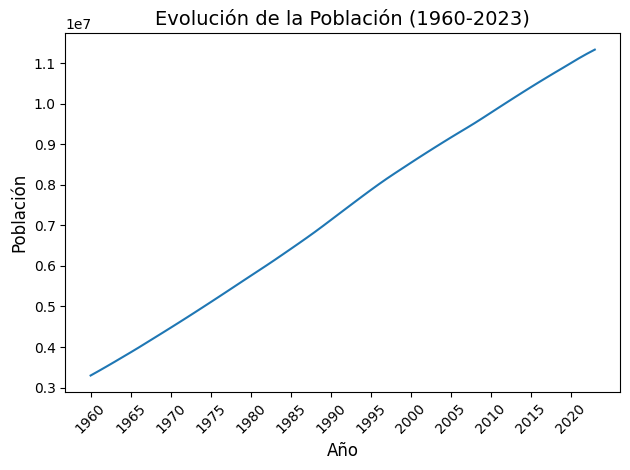

In [328]:
sns.lineplot(x='ANOOCU', y='Población', data=df_poblacional)
plt.title("Evolución de la Población (1960-2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Población", fontsize=12)
plt.xticks(range(1960, 2024, 5), rotation=45)  
plt.yticks(range(3000000, 12000000, 1000000))
plt.tight_layout()
plt.show()

# Series temporales

Para las series predictivas, mis data frames son:

In [329]:
df_poblacional.head()

,ANOOCU,Población
0,1960,3298021
1,1961,3408415
2,1962,3521164
3,1963,3635798
4,1964,3752313


In [330]:
df_accidentes_seriet.head()

,Accidentes
FECHA,
2007-01-01,138
2007-02-01,125
2007-03-01,134
2007-04-01,130
2007-05-01,108


In [331]:
df_defunciones_seriet.head()

,Defunciones
FECHA,
2007-01-01,146
2007-02-01,136
2007-03-01,156
2007-04-01,147
2007-05-01,117


In [332]:
autos_historicos_rd = df_historico.T

In [333]:
autos_historicos_rd = autos_historicos_rd.iloc[1:, 8:]
autos_historicos_rd.columns = ['Total']

In [334]:
autos_historicos_rd.head()

,Total
1998,936083.0
1999,1090833.0
2000,1294998.0
2001,1436165.0
2002,1611023.0


In [335]:
df_accidentes_seriet.to_csv('../Datos/datos_accidentes/datos_accidentes_seriet.csv')
df_defunciones_seriet.to_csv('../Datos/datos_defunciones/datos_defunciones_seriet.csv')
autos_historicos_rd.to_csv('../Datos/datos_parquev/parquev_historico.csv')
df_poblacional.to_csv('../Datos/Datos_poblacion.csv')

In [336]:
prueba_prophet = df_defunciones_seriet.copy()

In [337]:
prueba_prophet.reset_index(inplace=True)

In [338]:
prueba_prophet['FECHA'] = pd.to_datetime(prueba_prophet['FECHA'])

In [339]:
prueba_prophet.head()

,FECHA,Defunciones
0,2007-01-01,146
1,2007-02-01,136
2,2007-03-01,156
3,2007-04-01,147
4,2007-05-01,117


In [340]:
prueba_prophet.head(15)

,FECHA,Defunciones
0,2007-01-01,146
1,2007-02-01,136
2,2007-03-01,156
3,2007-04-01,147
4,2007-05-01,117
5,2007-06-01,135
6,2007-07-01,136
7,2007-08-01,141
8,2007-09-01,160
9,2007-10-01,134


In [341]:
prueba_prophet.columns = ['ds', 'y']

In [342]:
prueba_prophet.shape

(204, 2)

In [343]:
from prophet import Prophet
m = Prophet()
m.fit(prueba_prophet)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
m.predict(future)

15:40:44 - cmdstanpy - INFO - Chain [1] start processing
15:40:44 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,155.521392,132.105122,187.591018,155.521392,155.521392,3.955636,3.955636,3.955636,3.955636,3.955636,3.955636,0.0,0.0,0.0,159.477028
1,2007-02-01,155.500790,123.598941,180.861498,155.500790,155.500790,-3.654505,-3.654505,-3.654505,-3.654505,-3.654505,-3.654505,0.0,0.0,0.0,151.846285
2,2007-03-01,155.482182,130.488957,187.889841,155.482182,155.482182,4.279405,4.279405,4.279405,4.279405,4.279405,4.279405,0.0,0.0,0.0,159.761587
3,2007-04-01,155.461580,126.932175,182.007200,155.461580,155.461580,-2.097918,-2.097918,-2.097918,-2.097918,-2.097918,-2.097918,0.0,0.0,0.0,153.363662
4,2007-05-01,155.441643,125.167629,178.970553,155.441643,155.441643,-3.911478,-3.911478,-3.911478,-3.911478,-3.911478,-3.911478,0.0,0.0,0.0,151.530165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2024-11-26,151.207450,149.597428,204.188001,151.207249,151.207623,26.434647,26.434647,26.434647,26.434647,26.434647,26.434647,0.0,0.0,0.0,177.642097
565,2024-11-27,151.206799,150.800528,204.995228,151.206597,151.206972,28.124385,28.124385,28.124385,28.124385,28.124385,28.124385,0.0,0.0,0.0,179.331184
566,2024-11-28,151.206148,152.796501,207.855165,151.205944,151.206321,29.561792,29.561792,29.561792,29.561792,29.561792,29.561792,0.0,0.0,0.0,180.767940
567,2024-11-29,151.205496,153.557185,208.990565,151.205292,151.205670,30.728663,30.728663,30.728663,30.728663,30.728663,30.728663,0.0,0.0,0.0,181.934159
